In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [100]:
DATA_FOLDER = 'LAM data'
FIG_FOLDER = 'fig'

os.makedirs(FIG_FOLDER, exist_ok=True)

In [101]:
data_file_north = os.path.join(DATA_FOLDER, 'lamraw_4_18_276.xlsx')
# data_file_south = os.path.join(DATA_FOLDER, 'lamraw_107_18_276.xlsx')
# data_file_east = os.path.join(DATA_FOLDER, 'lamraw_159_18_276.xlsx')
# data_file_west = os.path.join(DATA_FOLDER, 'lamraw_128_18_276.xlsx')

df_n = pd.read_excel(data_file_north)
# df_s = pd.read_excel(data_file_south)
# df_e = pd.read_excel(data_file_east)
# df_w = pd.read_excel(data_file_west)

df_n

,Measurement point,year,day,hour,minute,second,hunderths of a second,vehicle lenght (m),lane,direction,vehicle class,speed,"If faulty, 1",Time (technical),time period (technical),start (technical)
0,4,18,276,0,0,8,99,1960-03-01 00:00:00,2,Hämeenlinna,1,92,0,899,-2,0
1,4,18,276,0,0,9,53,1980-03-01 00:00:00,3,Hämeenlinna,1,102,0,953,-2,0
2,4,18,276,0,0,18,4,1960-03-01 00:00:00,2,Hämeenlinna,1,101,0,1804,890,0
3,4,18,276,0,0,41,99,1980-03-01 00:00:00,6,Helsinki,1,106,0,4199,-2,0
4,4,18,276,0,0,46,99,22.20,5,Helsinki,5,92,0,4699,-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64823,4,18,276,23,59,19,99,1960-03-01 00:00:00,2,Hämeenlinna,1,93,0,8635999,4286,0
64824,4,18,276,23,59,20,63,1960-03-01 00:00:00,2,Hämeenlinna,1,95,0,8636063,50,0
64825,4,18,276,23,59,21,99,2020-03-01 00:00:00,2,Hämeenlinna,1,89,0,8636199,122,0
64826,4,18,276,23,59,31,99,1960-06-01 00:00:00,2,Hämeenlinna,1,99,0,8637199,987,0


Between 6:00 - 9:00

In [ ]:
df.hour(datetime.time(hour=6) <= df_n.time_event) & (df_n.time_event < datetime.time(hour=9))

In [95]:
# def f(x): 
#     return datetime.time(x['hour'], x['minute'], x['second'])
# df_n['time_event'] = df_n.apply(f, axis=1)

In [96]:
timing_6to9 = (datetime.time(hour=6) <= df_n.time_event) & (df_n.time_event < datetime.time(hour=9))
timing_6to9

0        False
1        False
2        False
3        False
4        False
         ...  
64823    False
64824    False
64825    False
64826    False
64827    False
Name: time_event, Length: 64828, dtype: bool

In [97]:
dirHelsinki = df_n['direction'] == 'Helsinki'
dirHelsinki

0        False
1        False
2        False
3         True
4         True
         ...  
64823    False
64824    False
64825    False
64826    False
64827    False
Name: direction, Length: 64828, dtype: bool

In [98]:
df_timing_6to9_dirHelsinki = df_n[timing_6to9 & dirHelsinki]
df_timing_6to9_dirHelsinki

,Measurement point,year,day,hour,minute,second,hunderths of a second,vehicle lenght (m),lane,direction,vehicle class,speed,"If faulty, 1",Time (technical),time period (technical),start (technical),time_event
2562,4,18,276,6,0,1,5,3.00,6,Helsinki,1,80,0,2160105,392,0,06:00:01
2564,4,18,276,6,0,2,99,1980-03-01 00:00:00,6,Helsinki,1,83,0,2160299,180,0,06:00:02
2565,4,18,276,6,0,3,4,1980-03-01 00:00:00,5,Helsinki,1,94,0,2160304,893,0,06:00:03
2566,4,18,276,6,0,4,99,1960-03-01 00:00:00,6,Helsinki,1,88,0,2160499,183,0,06:00:04
2568,4,18,276,6,0,6,25,1980-03-01 00:00:00,6,Helsinki,1,88,0,2160625,111,0,06:00:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17061,4,18,276,8,59,53,13,4.00,6,Helsinki,1,91,0,3239313,591,0,08:59:53
17062,4,18,276,8,59,53,99,2020-04-01 00:00:00,4,Helsinki,1,102,0,3239399,1130,0,08:59:53
17064,4,18,276,8,59,56,99,1960-05-01 00:00:00,6,Helsinki,1,89,0,3239699,370,0,08:59:56
17065,4,18,276,8,59,56,99,1980-03-01 00:00:00,5,Helsinki,1,99,0,3239699,655,0,08:59:56


In [85]:
speed = df_timing_6to9_dirHelsinki['speed']

In [86]:
np.mean(speed) # average speed 

56.42948392983879

In [87]:
np.std(speed)

25.162259014759876

<AxesSubplot:xlabel='speed', ylabel='Density'>

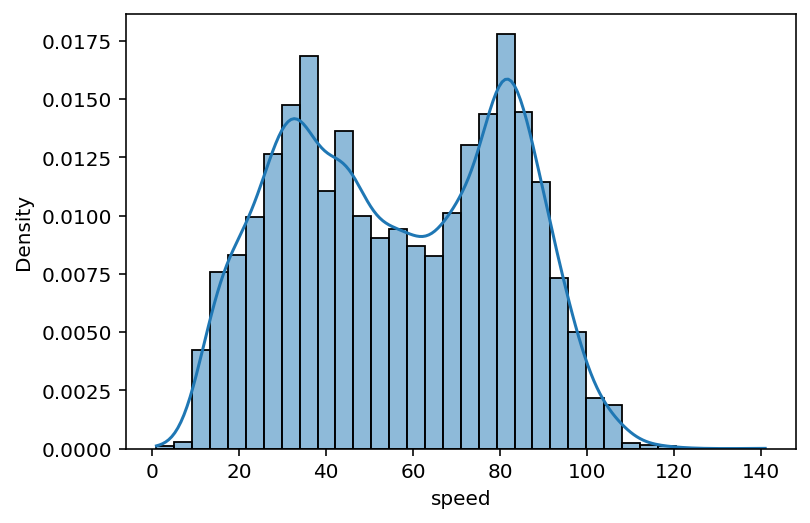

In [88]:
sns.histplot(speed, stat="density", kde=True)

In [ ]:
avr_agr_speed = df_timing_6to9_dirHelsinki['speed' & '']
speed

In [ ]:
df_timing_6to9_dirHelsinki_agr5min = df_n[timing_6to9 & dirHelsinki] 

In [ ]:
t = df_n[timing_6to9 & dirHelsinki] 
for i in range(0,5,36):
    

In [91]:
datetime.time(hour=6) & datetime.timedelta(minutes=5)

TypeError: unsupported operand type(s) for &: 'datetime.time' and 'datetime.timedelta'

In [89]:
df_n_good_t['direction'].value_counts()

Helsinki       9863
Hämeenlinna    4644
Name: direction, dtype: int64

In [16]:
df_s

,Measurement point,year,day,hour,minute,second,hunderths of a second,vehicle lenght (m),lane,direction,vehicle class,speed,"If faulty, 1",Time (technical),time period (technical),start (technical)
0,107,18,276,0,0,11,15,1940-03-01 00:00:00,1,Hämeenlinna,1,83,0,1115,-2,0
1,107,18,276,0,0,20,55,1960-03-01 00:00:00,4,Helsinki,1,76,0,2055,-2,0
2,107,18,276,0,1,36,4,1940-03-01 00:00:00,1,Hämeenlinna,1,81,0,9604,8474,0
3,107,18,276,0,2,8,14,1940-04-01 00:00:00,1,Hämeenlinna,1,93,0,12814,3194,0
4,107,18,276,0,2,18,33,6.00,3,Helsinki,1,79,0,13833,-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60270,107,18,276,23,58,58,0,1980-03-01 00:00:00,4,Helsinki,1,85,0,8633800,4283,0
60271,107,18,276,23,59,5,83,16.00,4,Helsinki,4,58,0,8634583,766,0
60272,107,18,276,23,59,12,48,1980-03-01 00:00:00,4,Helsinki,1,84,0,8635248,565,0
60273,107,18,276,23,59,31,63,4.00,1,Hämeenlinna,1,86,0,8637163,9076,0


Between 6:00 - 9:00

In [54]:
def f(x): 
    return datetime.time(x['hour'], x['minute'], x['second'])
df_s['time_event'] = df_s.apply(f, axis=1)

In [55]:
df_timing_6to9 = df_s[(datetime.time(hour=6) <= df_s.time_event) & (df_s.time_event < datetime.time(hour=9))]

In [56]:
df_timing_6to9['direction'].value_counts()

Helsinki       8038
Hämeenlinna    4915
Name: direction, dtype: int64

at 23004, $\vec{Helsinki}$ - at 23107, $\vec{Helsinki}$

In [1]:
9863 -  8038

1825

So 1825 needed to be ramp-out between 004 and 107 (direction to Helsinki)?

In [17]:
df_e

,Measurement point,year,day,hour,minute,second,hunderths of a second,vehicle lenght (m),lane,direction,vehicle class,speed,"If faulty, 1",Time (technical),time period (technical),start (technical)
0,159,18,276,0,0,10,99,1980-05-01 00:00:00,2,Vantaa,1,85,0,1099,-2,0
1,159,18,276,0,0,10,10,4.00,1,Vantaa,1,82,0,1010,-2,0
2,159,18,276,0,0,13,23,1940-03-01 00:00:00,2,Vantaa,1,79,0,1323,199,0
3,159,18,276,0,0,43,99,3.00,4,Espoo,1,79,0,4399,-2,0
4,159,18,276,0,0,49,15,3.00,4,Espoo,1,70,0,4915,502,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65961,159,18,276,23,59,22,81,25.00,1,Vantaa,5,78,0,8636281,1642,0
65962,159,18,276,23,59,24,99,4.00,4,Espoo,1,57,0,8636499,618,0
65963,159,18,276,23,59,46,25,1.00,1,Vantaa,1,1,1,8638625,2228,0
65964,159,18,276,23,59,50,99,1940-03-01 00:00:00,4,Espoo,1,66,0,8639099,2574,0


Between 6:00 - 9:00

In [57]:
def f(x): 
    return datetime.time(x['hour'], x['minute'], x['second'])
df_e['time_event'] = df_e.apply(f, axis=1)

In [58]:
df_timing_6to9 = df_e[(datetime.time(hour=6) <= df_e.time_event) & (df_e.time_event < datetime.time(hour=9))]

In [59]:
df_timing_6to9['direction'].value_counts()

Vantaa    9069
Espoo     7336
Name: direction, dtype: int64

In [18]:
df_w

,Measurement point,year,day,hour,minute,second,hunderths of a second,vehicle lenght (m),lane,direction,vehicle class,speed,"If faulty, 1",Time (technical),time period (technical),start (technical)
0,128,18,276,0,0,18,99,2020-04-01 00:00:00,5,Espoo,1,83,0,1899,-2,0
1,128,18,276,0,0,20,99,1940-03-01 00:00:00,5,Espoo,1,83,0,2099,181,0
2,128,18,276,0,0,24,53,17.20,5,Espoo,5,81,0,2453,339,0
3,128,18,276,0,0,28,99,6.00,2,Vantaa,1,79,0,2899,-2,0
4,128,18,276,0,0,35,48,24.20,2,Vantaa,5,83,0,3548,621,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91799,128,18,276,23,59,15,17,2020-03-01 00:00:00,2,Vantaa,1,81,0,8635517,300,0
91800,128,18,276,23,59,17,99,1940-03-01 00:00:00,5,Espoo,1,96,0,8635799,3484,0
91801,128,18,276,23,59,24,69,2020-11-01 00:00:00,1,Vantaa,2,79,0,8636469,14555,0
91802,128,18,276,23,59,54,99,16.60,2,Vantaa,4,74,0,8639499,3967,0


Between 6:00 - 9:00

In [60]:
def f(x): 
    return datetime.time(x['hour'], x['minute'], x['second'])
df_w['time_event'] = df_w.apply(f, axis=1)

In [61]:
df_timing_6to9 = df_w[(datetime.time(hour=6) <= df_w.time_event) & (df_w.time_event < datetime.time(hour=9))]

In [62]:
df_timing_6to9['direction'].value_counts()

Vantaa    10350
Espoo      9113
Name: direction, dtype: int64

In [65]:
Direction_Vantaa_dvg_NS = 10350 - 9069
print(Direction_Vantaa_dvgNS) # we do not know the volume of traffic went north or south

1281


In [66]:
Direction_Espoo_dvg_NS = 9113 - 7336
print(Direction_Espoo_dvg_NS)

1777


In [67]:
Direction_Hämeenlinna_dgv_EW = 4915 - 4644
print(Direction_Hämeenlinna_dgv_EW)

271


In [68]:
Direction_Helsinki_dvg_EW = 9863 - 8038
print(Direction_Helsinki_dvg_EW)

1825


Text(0.5, 1.0, '145 - Tapiola / Itäkeskus')

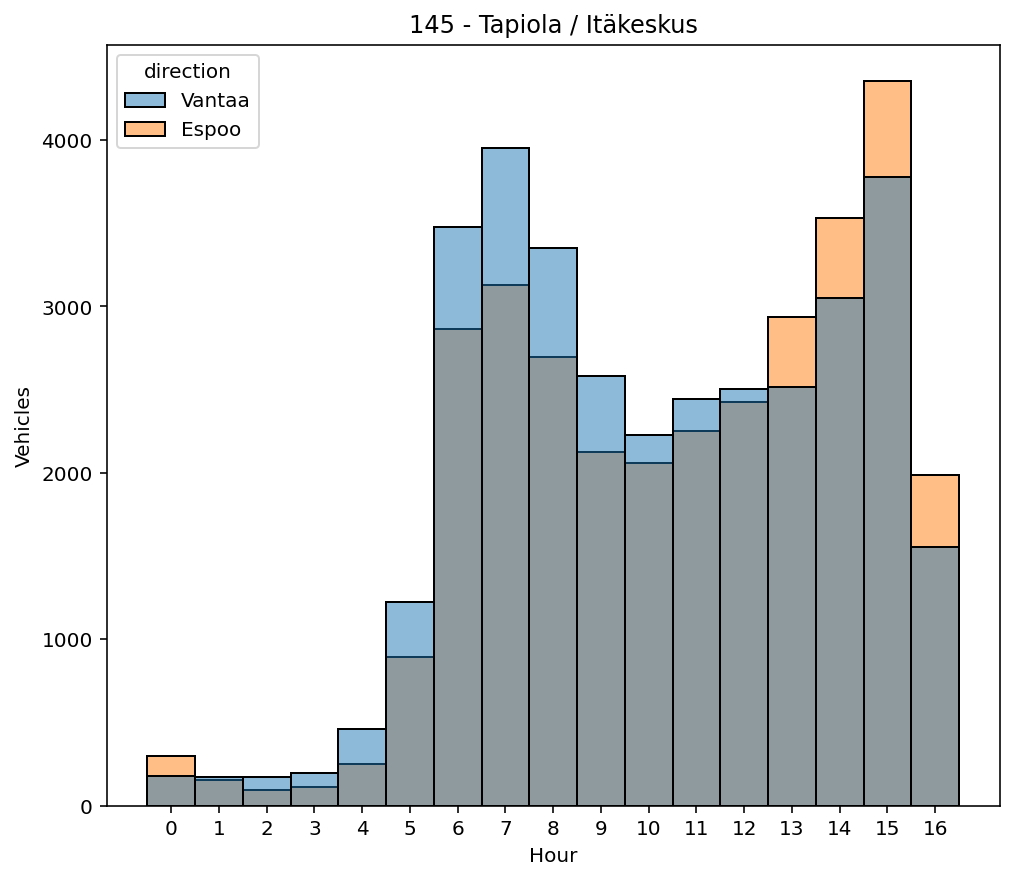

In [29]:
fig, ax = plt.subplots(figsize=(8, 7))
df_e['hour_str'] = df.hour.astype(str)
sns.histplot(df_e, x='hour_str', hue='direction', ax=ax) # kde=True
ax.set_xlabel('Hour')
ax.set_ylabel('Vehicles')
ax.set_title("145 - Tapiola / Itäkeskus")

In [7]:
n_m = 8038 # cars
T = 3 # hours
L = 4 # meters

q = n_m / T
k = n_m / L
v = q / k
print('Average speed', v,'(km/h)')

Average speed 1.3333333333333335 (km/h)
